In [1]:
!which python

/usr/local/pace-apps/manual/packages/anaconda3/2022.05/bin/python


In [1]:
from neo4j import GraphDatabase

import json
import requests
import pandas as pd

In [2]:
class Neo4jConnection:
    # Constructor to initialize the Neo4jConnection object with URI, username, and password.
    def __init__(self, uri, user, pwd):
        self.__uri = uri  # Store the provided URI for the Neo4j database.
        self.__user = user  # Store the username for authentication.
        self.__pwd = pwd  # Store the password for authentication.
        self.__driver = None  # Initialize the Neo4j driver as None.
        try:
            # Attempt to create a connection to the Neo4j database using the provided credentials.
            self.__driver = GraphDatabase.driver(self.__uri, auth=(self.__user, self.__pwd))
        except Exception as e:
            print("Failed to create the driver:", e)
    
    # Method to close the Neo4j driver and free up any associated resources.
    def close(self):
        if self.__driver is not None:
            self.__driver.close()
    
    # Method to execute a query on the Neo4j database and return the results.
    # The "db" parameter is optional and used to specify the database in the connection (defaults to "vip-vxg-summer2023").
    def query(self, query, parameters=None, db="vip-vxg-summer2023"):
        assert self.__driver is not None, "Driver not initialized!"
        session = None
        response = None
        try:
            # Open a session to the specified database (default "vip-vxg-summer2023") or the default database if None is provided.
            session = self.__driver.session(database=db) if db is not None else self.__driver.session() 
            # Execute the provided query with optional parameters and store the response as a list of results.
            response = list(session.run(query, parameters))
        except Exception as e:
            print("Query failed:", e)
        finally:
            # Close the session to release any acquired resources.
            if session is not None:
                session.close()
        return response


In [3]:
#create the connection to the neo4j dev database
conn = Neo4jConnection(uri = "neo4j+ssc://neo4j-dev.pace.gatech.edu:7687", 
                       user="",              
                       pwd="")

### Total number of 'WORKED_AT' relationships

In [6]:
#number of "WORKED_AT" relationships
query01 = conn.query("""MATCH ()-[r:WORKED_AT]->()
RETURN count(r) as NumberOfWorkedAtRelationships;""")

worked_at = query01[0]['NumberOfWorkedAtRelationships']
print(f"There are {worked_at} 'WORKED_AT' relationships in the graph")

There are 376750 'WORKED_AT' relationships in the graph


### Total number of 'WORKING_AT' relationships

In [6]:
#number of "WORKED_AT" relationships
query01 = conn.query("""MATCH ()-[r:WORKING_AT]->()
RETURN count(r) as NumberOfWorkingAtRelationships;""")

worked_at = query01[0]['NumberOfWorkingAtRelationships']
print(f"There are {worked_at} 'WORKING_AT' relationships in the graph")

There are 40388 'WORKING_AT' relationships in the graph


### Total number of 'AUTHORED' relationships

In [7]:
#number of "AUTHORED_WITH" relationships
query02 = conn.query("""MATCH ()-[r:AUTHORED]->()
RETURN count(r) as NumberOfAuthoredRelationships;""")
authored = query02[0]['NumberOfAuthoredRelationships']
print(f"There are {authored} 'AUTHORED' relationships in the graph")

There are 980946 'AUTHORED' relationships in the graph


### Total number of 'COLLABORATED_WITH' relationships

In [8]:
#number of "COLLABORATED_WITH" relationships
query02 = conn.query("""MATCH ()-[r:COLLABORATED_WITH]->()
RETURN count(r) as NumberOfCollabedRelationships;""")
collabed = query02[0]['NumberOfCollabedRelationships']
print(f"There are {collabed} 'Collabed' relationships in the graph")

There are 1295582 'Collabed' relationships in the graph


### Total number of 'Author' nodes

In [9]:
#number of author nodes
query03 = conn.query("""MATCH (a:Author)
RETURN count(a) as NumberOfAuthors;""")
num_authors = query03[0]['NumberOfAuthors']
print(f"There are {num_authors} 'Author' nodes in the graph")

There are 338785 'Author' nodes in the graph


### Total number of 'Institution' nodes

In [10]:
#number of "Instutition" nodes
query04 = conn.query("""MATCH (i:Institution)
RETURN count(i) as NumberOfInstitutions;""")
num_institutions = query04[0]['NumberOfInstitutions']
print(f"There are {num_institutions} 'Institution' nodes in the graph")

There are 18571 'Institution' nodes in the graph


### Total number of 'Work' nodes

In [11]:
#number of "Work" nodes
query = conn.query("""MATCH (i:Work)
RETURN count(i) as NumberOfWorks;""")
num_works = query[0]['NumberOfWorks']
print(f"There are {num_works} 'Work' nodes in the graph")

There are 230881 'Work' nodes in the graph


### Querying every author in the database and conveting into a dataframe

In [12]:
query05 = conn.query("""MATCH (a:Author) RETURN a.name AS Author_Name, a.id AS OpenAlexID, a.works_count AS Works_Count, a.cited_by_count as Cited_by_Count ORDER BY a.name;""" )

In [13]:
#convert the neo4j query into a pandas dataframe
columns = ["Author_Name","OpenAlexID", "Works_Count", "Cited_by_Count"]
data = [[record[col] for col in columns] for record in query05]
df = pd.DataFrame(data, columns=columns)

In [14]:
df

,Author_Name,OpenAlexID,Works_Count,Cited_by_Count
0,&gtKhalid Hattar,https://openalex.org/A4259382652,NaN,NaN
1,1,https://openalex.org/A4351284220,NaN,NaN
2,A A Alexander,https://openalex.org/A4336288564,NaN,NaN
3,A A Connor,https://openalex.org/A4364385891,1.0,0.0
4,A A Kotlobay,https://openalex.org/A4346631785,NaN,NaN
...,...,...,...,...
338780,飯田 史也,https://openalex.org/A2513598885,NaN,NaN
338781,노인규 ( In Kyu Loh ),https://openalex.org/A2649552942,NaN,NaN
338782,류진숙 ( Lyu Jin Sug ),https://openalex.org/A4346090754,NaN,NaN
338783,심한수 ( Han Su Shim ),https://openalex.org/A2898228287,NaN,NaN


In [15]:
# Convert the 'Works_Count' column to integer
df['Works_Count'] = pd.to_numeric(df['Works_Count'])
# Sum up all the values in the 'Works_Count' column
total_works = df['Works_Count'].sum()
print(total_works)

410146.0


### Returning a list of all GT authors by using the "WORKED_AT" relationship

In [16]:
#query GT author nodes using worked_at
query06 = conn.query("""MATCH (a:Author)-[:WORKED_AT]->(i:Institution) 
WHERE i.name = "Georgia Institute of Technology" RETURN DISTINCT a.id AS OpenAlexID, a.name AS Author_Name,  
a.works_count AS Works_Count, a.cited_by_count as Cited_by_Count 
ORDER BY a.name;""" )

In [17]:
#convert the neo4j query into a pandas dataframe
columns = ["Author_Name","OpenAlexID", "Works_Count", "Cited_by_Count"]
data = [[record[col] for col in columns] for record in query06]
df_GT_workedAt = pd.DataFrame(data, columns=columns)

In [18]:
df_GT_workedAt

,Author_Name,OpenAlexID,Works_Count,Cited_by_Count
0,1,https://openalex.org/A4351284220,None,None
1,A Abrol,https://openalex.org/A2395249896,None,None
2,A Al-Basheer,https://openalex.org/A2885361699,None,None
3,A B Vesic,https://openalex.org/A1913918226,None,None
4,A BotchweyEdward,https://openalex.org/A2922596315,None,None
...,...,...,...,...
41746,⊥ Sei-Hum Jiang,https://openalex.org/A2669257371,None,None
41747,倉田 真宏,https://openalex.org/A2620726013,None,None
41748,淳 上田,https://openalex.org/A4338492772,None,None
41749,稔 篠原,https://openalex.org/A2680932621,None,None


In [19]:
# Convert the 'Works_Count' column to integer
df_GT_workedAt['Works_Count'] = pd.to_numeric(df_GT_workedAt['Works_Count'])
# Sum up all the values in the 'Works_Count' column
total_works_GT = df_GT_workedAt['Works_Count'].sum()
print(total_works_GT)

0.0


In [20]:
#convert dataframe to csv
df_GT_workedAt.to_csv("Dev_GT_WorkedAt.csv", index = False)

### Returning a list of all GT authors by using the "WORKING_AT" relationship

In [21]:
#query GT author nodes using working_at
query06 = conn.query("""MATCH (a:Author)-[:WORKING_AT]->(i:Institution) 
WHERE i.name = "Georgia Institute of Technology" RETURN DISTINCT a.id AS OpenAlexID, a.name AS Author_Name,
 a.works_count AS Works_Count, a.cited_by_count as Cited_by_Count 
ORDER BY a.name;""" )

In [22]:
#convert the neo4j query into a pandas dataframe
columns = ["OpenAlexID","Author_Name", "Works_Count", "Cited_by_Count"]
data = [[record[col] for col in columns] for record in query06]
df_GT_workingAt = pd.DataFrame(data, columns=columns)
df_GT_workingAt

,OpenAlexID,Author_Name,Works_Count,Cited_by_Count
0,https://openalex.org/A4364385891,A A Connor,1,0
1,https://openalex.org/A2974832469,A A Pande,1,8
2,https://openalex.org/A2431936401,A Albanese Lerner,1,140
3,https://openalex.org/A2467434963,A Alluri,1,0
4,https://openalex.org/A2628585621,A Asa,1,7
...,...,...,...,...
40383,https://openalex.org/A2802679075,В. Ф. Королович,1,0
40384,https://openalex.org/A4314819545,Дорон Шауль Любински,1,0
40385,https://openalex.org/A3217361776,Юрий Олегович Чернов,1,0
40386,https://openalex.org/A3203156333,† Shou-Yuan Lin,1,17


In [23]:
df_GT_workingAt.to_csv("Dev_GT_WorkingAt.csv", index = False)

### Returning a list of all non-GT authors by using the "WORKING_AT" relationship

In [24]:
#query GT author nodes using working_at
query06 = conn.query("""MATCH (a:Author)-[:WORKING_AT]->(i:Institution) 
WHERE i.name <> "Georgia Institute of Technology" RETURN a.name AS Author_Name,
a.id AS OpenAlexID, a.works_count AS Works_Count, a.cited_by_count as Cited_by_Count 
ORDER BY a.name;""" )

In [25]:
#convert the neo4j query into a pandas dataframe
columns = ["Author_Name","OpenAlexID", "Works_Count", "Cited_by_Count"]
data = [[record[col] for col in columns] for record in query06]
df_nonGT_workingAt = pd.DataFrame(data, columns=columns)
df_nonGT_workingAt

,Author_Name,OpenAlexID,Works_Count,Cited_by_Count


### Returning a list of all non-GT authors by using the "WORKED_AT" relationship

In [26]:
#query GT author nodes using working_at
query06 = conn.query("""MATCH (a:Author)-[:WORKED_AT]->(i:Institution) 
WHERE i.name <> "Georgia Institute of Technology" RETURN DISTINCT a.id AS OpenAlexID, a.name AS Author_Name,
 a.works_count AS Works_Count, a.cited_by_count as Cited_by_Count 
ORDER BY a.name;""" )

In [27]:
#convert the neo4j query into a pandas dataframe
columns = ["OpenAlexID","Author_Name", "Works_Count", "Cited_by_Count"]
data = [[record[col] for col in columns] for record in query06]
df_nonGT_workedAt = pd.DataFrame(data, columns=columns)
df_nonGT_workedAt

,OpenAlexID,Author_Name,Works_Count,Cited_by_Count
0,https://openalex.org/A4259382652,&gtKhalid Hattar,None,None
1,https://openalex.org/A4351284220,1,None,None
2,https://openalex.org/A4336288564,A A Alexander,None,None
3,https://openalex.org/A4346631785,A A Kotlobay,None,None
4,https://openalex.org/A1573074119,A A Kotlobay,None,None
...,...,...,...,...
261521,https://openalex.org/A2611078207,長谷川 拓也,None,None
261522,https://openalex.org/A2095693721,雲輝 劉,None,None
261523,https://openalex.org/A2513598885,飯田 史也,None,None
261524,https://openalex.org/A2649552942,노인규 ( In Kyu Loh ),None,None


### Checking the overlap between list of GT authors queried using "WORKING_AT" and "WORKED_AT"

In [28]:
# Perform the merge based on "OpenAlexID" column
merged_df = pd.merge( df_GT_workedAt, df_GT_workingAt, on="OpenAlexID")
merged_df

,Author_Name_x,OpenAlexID,Works_Count_x,Cited_by_Count_x,Author_Name_y,Works_Count_y,Cited_by_Count_y


In [29]:
# Perform the merge based on "Author_Name" column
merged_df = pd.merge(df_GT_workingAt, df_GT_workedAt, on="Author_Name")
merged_df

,OpenAlexID_x,Author_Name,Works_Count_x,Cited_by_Count_x,OpenAlexID_y,Works_Count_y,Cited_by_Count_y
0,https://openalex.org/A2974760907,A. Adas,3,314,https://openalex.org/A2643939817,NaN,None
1,https://openalex.org/A4371145239,A. B. Huang,1,14,https://openalex.org/A4369941551,NaN,None
2,https://openalex.org/A4371145239,A. B. Huang,1,14,https://openalex.org/A4373674427,NaN,None
3,https://openalex.org/A3120720103,A. Beach,2,9,https://openalex.org/A2641789861,NaN,None
4,https://openalex.org/A2318873278,A. Ben Huang,5,26,https://openalex.org/A4369896909,NaN,None
...,...,...,...,...,...,...,...
19759,https://openalex.org/A4357601833,Ümit V. Çatalyürek,1,0,https://openalex.org/A4303575810,NaN,None
19760,https://openalex.org/A244960322,Ümit V. Çatalyürek,4,123,https://openalex.org/A4367211856,NaN,None
19761,https://openalex.org/A244960322,Ümit V. Çatalyürek,4,123,https://openalex.org/A4303575810,NaN,None
19762,https://openalex.org/A4359584701,Ümit V. Çatalyürek,100,1639,https://openalex.org/A4367211856,NaN,None


In [30]:
# merged_df_raw = merged_df.iloc[:, 0:3]
merged_df_raw = merged_df
# merged_df_raw.rename(columns = {'OpenAlexID_x':'OpenAlexID','Works_Count_x':'Works_Count'}, inplace=True)
merged_df_raw.to_csv('merged_df_raw.csv', index= False)
merged_df_raw

,OpenAlexID_x,Author_Name,Works_Count_x,Cited_by_Count_x,OpenAlexID_y,Works_Count_y,Cited_by_Count_y
0,https://openalex.org/A2974760907,A. Adas,3,314,https://openalex.org/A2643939817,NaN,None
1,https://openalex.org/A4371145239,A. B. Huang,1,14,https://openalex.org/A4369941551,NaN,None
2,https://openalex.org/A4371145239,A. B. Huang,1,14,https://openalex.org/A4373674427,NaN,None
3,https://openalex.org/A3120720103,A. Beach,2,9,https://openalex.org/A2641789861,NaN,None
4,https://openalex.org/A2318873278,A. Ben Huang,5,26,https://openalex.org/A4369896909,NaN,None
...,...,...,...,...,...,...,...
19759,https://openalex.org/A4357601833,Ümit V. Çatalyürek,1,0,https://openalex.org/A4303575810,NaN,None
19760,https://openalex.org/A244960322,Ümit V. Çatalyürek,4,123,https://openalex.org/A4367211856,NaN,None
19761,https://openalex.org/A244960322,Ümit V. Çatalyürek,4,123,https://openalex.org/A4303575810,NaN,None
19762,https://openalex.org/A4359584701,Ümit V. Çatalyürek,100,1639,https://openalex.org/A4367211856,NaN,None


In [31]:
# merged_df_uniqueOpenAlexID = merged_df_raw.groupby('OpenAlexID').agg({'Author_Name':'first','Works_Count':'first'})
# merged_df_uniqueOpenAlexID.to_csv('merged_df_uniqueOpenAlexID', index = False)
# merged_df_uniqueOpenAlexID

In [32]:
#group by author name to get unique author name entires, then use the .agg function to specify how to group other columns
merged_df_uniqueAuthor = merged_df_raw.groupby('Author_Name').agg({'OpenAlexID_x':list,'Works_Count_x':'sum','OpenAlexID_y':list})
merged_df_uniqueAuthor.to_csv('merged_df_uniqueAuthor.csv')
merged_df_uniqueAuthor

,OpenAlexID_x,Works_Count_x,OpenAlexID_y
Author_Name,,,
A. Adas,[https://openalex.org/A2974760907],3,[https://openalex.org/A2643939817]
A. B. Huang,"[https://openalex.org/A4371145239, https://ope...",2,"[https://openalex.org/A4369941551, https://ope..."
A. Beach,[https://openalex.org/A3120720103],2,[https://openalex.org/A2641789861]
A. Ben Huang,[https://openalex.org/A2318873278],5,[https://openalex.org/A4369896909]
A. D. Mullen,[https://openalex.org/A2606333016],11,[https://openalex.org/A4320883745]
...,...,...,...
Zola A. Francis,[https://openalex.org/A2595041404],0,[https://openalex.org/A4368649137]
Zongbao Li,[https://openalex.org/A2107692371],1,[https://openalex.org/A4340787183]
Zongrun Li,[https://openalex.org/A4378321417],1,[https://openalex.org/A2920872437]


### Returning a list of all GT works based on Authors and "WORKED_AT" relationship

In [33]:
#match gt works based on author and worked_at relationship
query06 = conn.query("""MATCH (w:Work)-[:AUTHORED]-(a:Author)-[:WORKED_AT]->(i:Institution)
WHERE i.name = "Georgia Institute of Technology" RETURN DISTINCT w.id as OpenAlex_id, w.name as Title, 
w.cited_by_count as Cited_by_Count, w.doi as doi, w.corresponding_institution_ids as Corresponding_Institution_ids;""" )

In [34]:
#convert the neo4j query into a pandas dataframe
columns = ["OpenAlex_id","Title", "Cited_by_Count", "doi", "Corresponding_Institution_ids"]
data = [[record[col] for col in columns] for record in query06]
df_GT_works_workedAt = pd.DataFrame(data, columns=columns)
df_GT_works_workedAt

,OpenAlex_id,Title,Cited_by_Count,doi,Corresponding_Institution_ids
0,https://openalex.org/W2003411229,Dramatic enhancement of structure-borne wave e...,71,https://doi.org/10.1063/1.4719098,[]
1,https://openalex.org/W2015702773,Metamaterial-inspired structures and concepts ...,171,https://doi.org/10.1088/0964-1726/22/6/065004,[]
2,https://openalex.org/W2312339584,Metamaterial Concepts for Structure-Borne Wave...,1,https://doi.org/10.1115/smasis2012-8166,[]
3,https://openalex.org/W2067049949,Fourier transform-based design of a patterned ...,32,https://doi.org/10.1063/1.4905509,[]
4,https://openalex.org/W4376642130,Single-Cell and Spatial Analysis of Emergent O...,0,https://doi.org/10.1007/978-1-0716-3163-8_22,"[https://openalex.org/I2802612298, https://ope..."
...,...,...,...,...,...
128389,https://openalex.org/W2099516110,Detection of Rotor Faults in Brushless DC Moto...,112,https://doi.org/10.1109/tia.2006.882613,[]
128390,https://openalex.org/W2164389459,Wigner-Ville distributions for detection of ro...,24,https://doi.org/10.1109/demped.2005.4662511,[]
128391,https://openalex.org/W2076854147,Current/Voltage-Based Detection of Faults in G...,51,https://doi.org/10.1109/tia.2006.882636,[]
128392,https://openalex.org/W2550798801,A novel analytic wavelet ridge detector for dy...,2,https://doi.org/10.1109/iecon.2005.1569117,[]


### Returning a list of all GT works based on Authors and "WORKING_AT" relationship

In [35]:
#match gt works based on author and working_at relationship
query = conn.query("""MATCH (w:Work)-[:AUTHORED]-(a:Author)-[:WORKING_AT]-(i:Institution)
WHERE i.name = "Georgia Institute of Technology" RETURN DISTINCT w.id as OpenAlex_id, w.name as Title, 
w.cited_by_count as Cited_by_Count, w.doi as doi, w.corresponding_institution_ids as Corresponding_Institution_ids;""" )

In [36]:
#convert the neo4j query into a pandas dataframe
columns = ["OpenAlex_id","Title", "Cited_by_Count", "doi", "Corresponding_Institution_ids"]
data = [[record[col] for col in columns] for record in query]
df_GT_works_workingAt = pd.DataFrame(data, columns=columns)
df_GT_works_workingAt

,OpenAlex_id,Title,Cited_by_Count,doi,Corresponding_Institution_ids
0,https://openalex.org/W2104689689,Optimal control for a mixed flow of Hamiltonia...,10,https://doi.org/10.1090/s0002-9947-2013-05634-6,[]
1,https://openalex.org/W4322723422,Bedside Expedited Testing for Anemia in Tanzan...,0,https://doi.org/10.1542/peds.147.3ma3.230,[]
2,https://openalex.org/W2069196024,A geostatistical tool for drought management,5,https://doi.org/10.1016/0022-1694(89)90287-4,[]
3,https://openalex.org/W2314086163,"Columbus, Georgia, Earthquakes of October 31, ...",0,https://doi.org/10.1785/gssrl.56.2.55,[]
4,https://openalex.org/W2117162682,Nearshore Impacts of Dredging for Beach Nouris...,22,https://doi.org/10.1061/(asce)0733-950x(2004)1...,[]
...,...,...,...,...,...
185053,https://openalex.org/W2068485662,Assessing elemental mercury vapor exposure fro...,76,https://doi.org/10.1289/ehp.01109779,[]
185054,https://openalex.org/W1543370667,Computational design of nanoclusters by proper...,26,https://doi.org/10.1103/physrevb.91.241115,[]
185055,https://openalex.org/W2153092306,<i>Legionella Pneumophila</i>Pathogenesis: A F...,367,https://doi.org/10.1146/annurev.micro.54.1.567,[]
185056,https://openalex.org/W3217263589,Advances in vapor chambers and phase change he...,0,https://doi.org/10.1016/bs.aiht.2021.06.001,[]


### find all works that are Authored by a GT author with "WORKING_AT" relationship but not "WORKED_AT"

In [37]:
#cypher query to match authors that have working_at but not worked_at
query = conn.query("""MATCH (w:Work)-[:AUTHORED]-(a:Author)-[:WORKING_AT]-
(i:Institution {name: "Georgia Institute of Technology"})
WHERE NOT (a)-[:WORKED_AT]- (i)
RETURN DISTINCT w;""")


In [38]:
df_list=[]
for work in query:
    row = []
    work = work[0]
    row.append(work.get('id'))
    row.append(work.get('title'))
    row.append(work.get('created_date'))
    row.append(work.get('doi'))
    df_list.append(row)
df_columns = ['id','title','created_date','doi']
df = pd.DataFrame(df_list, columns=df_columns)
df

,id,title,created_date,doi
0,https://openalex.org/W2104689689,Optimal control for a mixed flow of Hamiltonia...,2016-06-24,https://doi.org/10.1090/s0002-9947-2013-05634-6
1,https://openalex.org/W4322723422,Bedside Expedited Testing for Anemia in Tanzan...,2023-03-03,https://doi.org/10.1542/peds.147.3ma3.230
2,https://openalex.org/W2069196024,A geostatistical tool for drought management,2016-06-24,https://doi.org/10.1016/0022-1694(89)90287-4
3,https://openalex.org/W2314086163,"Columbus, Georgia, Earthquakes of October 31, ...",2016-06-24,https://doi.org/10.1785/gssrl.56.2.55
4,https://openalex.org/W2117162682,Nearshore Impacts of Dredging for Beach Nouris...,2016-06-24,https://doi.org/10.1061/(asce)0733-950x(2004)1...
...,...,...,...,...
185053,https://openalex.org/W2068485662,Assessing elemental mercury vapor exposure fro...,2016-06-24,https://doi.org/10.1289/ehp.01109779
185054,https://openalex.org/W1543370667,Computational design of nanoclusters by proper...,2016-06-24,https://doi.org/10.1103/physrevb.91.241115
185055,https://openalex.org/W2153092306,<i>Legionella Pneumophila</i>Pathogenesis: A F...,2016-06-24,https://doi.org/10.1146/annurev.micro.54.1.567
185056,https://openalex.org/W3217263589,Advances in vapor chambers and phase change he...,2021-12-06,https://doi.org/10.1016/bs.aiht.2021.06.001


### find all works that are Authored by a GT author with "WORKED_AT" relationship but not "WORKING_AT"

In [39]:
#cyper query to match works with worked_at but not working_at
query = conn.query("""MATCH (w:Work)-[:AUTHORED]-(a:Author)-[:WORKED_AT]-(i:Institution {name: "Georgia Institute of Technology"})
WHERE NOT (a)-[:WORKING_AT]- (i)
RETURN DISTINCT w;""")


In [40]:
df_list=[]
for work in query:
    row = []
    work = work[0]
    row.append(work.get('id'))
    row.append(work.get('title'))
    row.append(work.get('created_date'))
    row.append(work.get('doi'))
    df_list.append(row)
df_columns = ['id','title','created_date','doi']
df = pd.DataFrame(df_list, columns=df_columns)
df

,id,title,created_date,doi
0,https://openalex.org/W2003411229,Dramatic enhancement of structure-borne wave e...,2016-06-24,https://doi.org/10.1063/1.4719098
1,https://openalex.org/W2015702773,Metamaterial-inspired structures and concepts ...,2016-06-24,https://doi.org/10.1088/0964-1726/22/6/065004
2,https://openalex.org/W2312339584,Metamaterial Concepts for Structure-Borne Wave...,2016-06-24,https://doi.org/10.1115/smasis2012-8166
3,https://openalex.org/W2067049949,Fourier transform-based design of a patterned ...,2016-06-24,https://doi.org/10.1063/1.4905509
4,https://openalex.org/W4376642130,Single-Cell and Spatial Analysis of Emergent O...,2023-05-17,https://doi.org/10.1007/978-1-0716-3163-8_22
...,...,...,...,...
128389,https://openalex.org/W2099516110,Detection of Rotor Faults in Brushless DC Moto...,2016-06-24,https://doi.org/10.1109/tia.2006.882613
128390,https://openalex.org/W2164389459,Wigner-Ville distributions for detection of ro...,2016-06-24,https://doi.org/10.1109/demped.2005.4662511
128391,https://openalex.org/W2076854147,Current/Voltage-Based Detection of Faults in G...,2016-06-24,https://doi.org/10.1109/tia.2006.882636
128392,https://openalex.org/W2550798801,A novel analytic wavelet ridge detector for dy...,2016-11-30,https://doi.org/10.1109/iecon.2005.1569117


### todo: find out all the works that have both "WORKED_AT" and "WORKING_AT" relationship from the same author

In [41]:
#match gt works based on their corresponding institution ids
#first get all the work nodes
query = conn.query("""MATCH (w:Work)<-[:AUTHORED]-(a:Author)-[:WORKING_AT]->(i:Institution) WHERE (a)-[:WORKED_AT]->(i)
RETURN DISTINCT w;""")

In [42]:
df_list=[]
for work in query:
    row = []
    work = work[0]
    row.append(work.get('id'))
    row.append(work.get('title'))
    row.append(work.get('created_date'))
    row.append(work.get('doi'))
    df_list.append(row)
df_columns = ['id','title','created_date','doi']
df = pd.DataFrame(df_list, columns=df_columns)
df

,id,title,created_date,doi


In [43]:
# Perform the merge based on "OpenAlexID" column
merged_df_works = pd.merge( df_GT_works_workedAt, df_GT_works_workingAt, on="OpenAlex_id")
merged_df_works

,OpenAlex_id,Title_x,Cited_by_Count_x,doi_x,Corresponding_Institution_ids_x,Title_y,Cited_by_Count_y,doi_y,Corresponding_Institution_ids_y
0,https://openalex.org/W2003411229,Dramatic enhancement of structure-borne wave e...,71,https://doi.org/10.1063/1.4719098,[],Dramatic enhancement of structure-borne wave e...,71,https://doi.org/10.1063/1.4719098,[]
1,https://openalex.org/W2015702773,Metamaterial-inspired structures and concepts ...,171,https://doi.org/10.1088/0964-1726/22/6/065004,[],Metamaterial-inspired structures and concepts ...,171,https://doi.org/10.1088/0964-1726/22/6/065004,[]
2,https://openalex.org/W2312339584,Metamaterial Concepts for Structure-Borne Wave...,1,https://doi.org/10.1115/smasis2012-8166,[],Metamaterial Concepts for Structure-Borne Wave...,1,https://doi.org/10.1115/smasis2012-8166,[]
3,https://openalex.org/W2067049949,Fourier transform-based design of a patterned ...,32,https://doi.org/10.1063/1.4905509,[],Fourier transform-based design of a patterned ...,32,https://doi.org/10.1063/1.4905509,[]
4,https://openalex.org/W4378071763,A Pseudomonas aeruginosa small RNA regulates c...,0,https://doi.org/10.1038/s41586-023-06111-7,"[https://openalex.org/I2800138454, https://ope...",A Pseudomonas aeruginosa small RNA regulates c...,0,https://doi.org/10.1038/s41586-023-06111-7,"[https://openalex.org/I2800138454, https://ope..."
...,...,...,...,...,...,...,...,...,...
82566,https://openalex.org/W2099516110,Detection of Rotor Faults in Brushless DC Moto...,112,https://doi.org/10.1109/tia.2006.882613,[],Detection of Rotor Faults in Brushless DC Moto...,112,https://doi.org/10.1109/tia.2006.882613,[]
82567,https://openalex.org/W2164389459,Wigner-Ville distributions for detection of ro...,24,https://doi.org/10.1109/demped.2005.4662511,[],Wigner-Ville distributions for detection of ro...,24,https://doi.org/10.1109/demped.2005.4662511,[]
82568,https://openalex.org/W2076854147,Current/Voltage-Based Detection of Faults in G...,51,https://doi.org/10.1109/tia.2006.882636,[],Current/Voltage-Based Detection of Faults in G...,51,https://doi.org/10.1109/tia.2006.882636,[]
82569,https://openalex.org/W2550798801,A novel analytic wavelet ridge detector for dy...,2,https://doi.org/10.1109/iecon.2005.1569117,[],A novel analytic wavelet ridge detector for dy...,2,https://doi.org/10.1109/iecon.2005.1569117,[]


### find all author nodes that has "WORKED_AT" and "WORKING_AT" with the same institution


In [44]:
query = conn.query("""MATCH (a:Author)-[:WORKING_AT]->(i:Institution),
      (a)-[:WORKED_AT]->(i)
RETURN a, i;""")


In [45]:
df_list=[]
for author in query:
    row = []
    author = author[0]
    row.append(author.get('id'))
    row.append(author.get('name'))
    row.append(author.get('display_name_alternatives'))
    df_list.append(row)
df_columns = ['id','name','display_name_alternatives']
df = pd.DataFrame(df_list, columns=df_columns)
df

,id,name,display_name_alternatives


## Query 1
### This query matches the non-GT institution that has done the most works with GT authors

In [4]:
#query 1 match institutions that has the most works done with Georgia Tech authors
query1 = conn.query(
"""OPTIONAL MATCH (inst1:Institution)-[:WORKING_AT|WORKED_AT]-(author:Author)-[:AUTHORED]-(w: Work)-[:AUTHORED]-
(author2: Author)-[:WORKED_AT]-(inst2:Institution)
WHERE  inst2.name <> 'Georgia Institute of Technology' and inst1.name = 'Georgia Institute of Technology'
WITH inst2, COLLECT(DISTINCT author2) AS overlapping_authors
ORDER BY SIZE(overlapping_authors) DESC
RETURN inst2.name, inst2.ror, overlapping_authors, SIZE(overlapping_authors);""")

In [5]:
query_columns = ["inst2.name","inst2.ror", "SIZE(overlapping_authors)", "overlapping_authors"]
df_columns = ["outside_institution", "outside_institution_ror", "number_collaborators","collaborating_authors"]
data = []
for record in query1:
    row = []
    for col in query_columns:
        if col != "overlapping_authors":
            row.append(record[col])
        #if column is overlapping_authors, we need to take out each author object and parse individually
        #because we can't perform operations on the neo4j "author_list" object
        elif col == "overlapping_authors":
            overlap_auth = []
            auth_list = record[col]
            for author in auth_list:
                #parse the ids string object into a python dictionary to access attributes
                id_1 = author.get("id")
                overlap_auth.append({'name': author.get("name"), 'OpenAlexID': None if id_1 is None else id_1})
            row.append(overlap_auth)
                
    data.append(row)
df = pd.DataFrame(data, columns=df_columns)

In [9]:
df.head(15)

,outside_institution,outside_institution_ror,number_collaborators,collaborating_authors
0,Emory University,https://ror.org/03czfpz43,6630,"[{'name': 'Sanjeevan Sharma', 'OpenAlexID': 'h..."
1,Chinese Academy of Sciences,https://ror.org/034t30j35,2871,"[{'name': 'Zheng Wang', 'OpenAlexID': 'https:/..."
2,The Wallace H. Coulter Department of Biomedica...,https://ror.org/02j15s898,2167,"[{'name': 'Sanjeevan Sharma', 'OpenAlexID': 'h..."
3,Massachusetts Institute of Technology,https://ror.org/042nb2s44,1992,"[{'name': 'Ruoyu Zhao', 'OpenAlexID': 'https:/..."
4,Harvard University,https://ror.org/03vek6s52,1985,"[{'name': 'Peter G. Walker', 'OpenAlexID': 'ht..."
5,Stanford University,https://ror.org/00f54p054,1901,"[{'name': 'Ruoyu Zhao', 'OpenAlexID': 'https:/..."
6,University of Illinois Urbana-Champaign,https://ror.org/047426m28,1786,"[{'name': 'David S. Sholl', 'OpenAlexID': 'htt..."
7,University of Michigan–Ann Arbor,https://ror.org/00jmfr291,1771,"[{'name': 'Scott T. Robinson', 'OpenAlexID': '..."
8,Oak Ridge National Laboratory,https://ror.org/01qz5mb56,1703,"[{'name': 'Jilai Ding', 'OpenAlexID': 'https:/..."
9,"University of California, Berkeley",https://ror.org/01an7q238,1688,"[{'name': 'Mostafa A. El-Sayed', 'OpenAlexID':..."


In [10]:
df.tail(10)

,outside_institution,outside_institution_ror,number_collaborators,collaborating_authors
16466,Tampere University Hospital,https://ror.org/02hvt5f17,1,"[{'name': 'Mika Kähönen', 'OpenAlexID': 'https..."
16467,Laboratory for Social and Neural Systems Research,https://ror.org/021p56f43,1,"[{'name': 'Ernst Fehr', 'OpenAlexID': 'https:/..."
16468,TomTom (Germany),https://ror.org/02pvy4b66,1,"[{'name': 'Sören Sonnenburg', 'OpenAlexID': 'h..."
16469,Uplift Education,https://ror.org/05nn94a79,1,"[{'name': 'Alex Wang', 'OpenAlexID': 'https://..."
16470,Microsoft (Netherlands),https://ror.org/01x21tj82,1,"[{'name': 'Max Welling', 'OpenAlexID': 'https:..."
16471,British Cycling,https://ror.org/02mq35511,1,"[{'name': 'Nigel Mitchell', 'OpenAlexID': 'htt..."
16472,Institut National du Sport et de l'Éducation P...,https://ror.org/03jczk481,1,"[{'name': 'Christophe Hausswirth', 'OpenAlexID..."
16473,Royal Dutch Lawn Tennis Federation,https://ror.org/02jhjfr59,1,"[{'name': 'Babette M Pluim', 'OpenAlexID': 'ht..."
16474,Tianjin Third Central Hospital,https://ror.org/00911j719,1,"[{'name': 'Yingtang Gao', 'OpenAlexID': 'https..."
16475,Banner Good Samaritan Medical Center,https://ror.org/01cjjjf51,1,"[{'name': 'Peter Nakaji', 'OpenAlexID': 'https..."


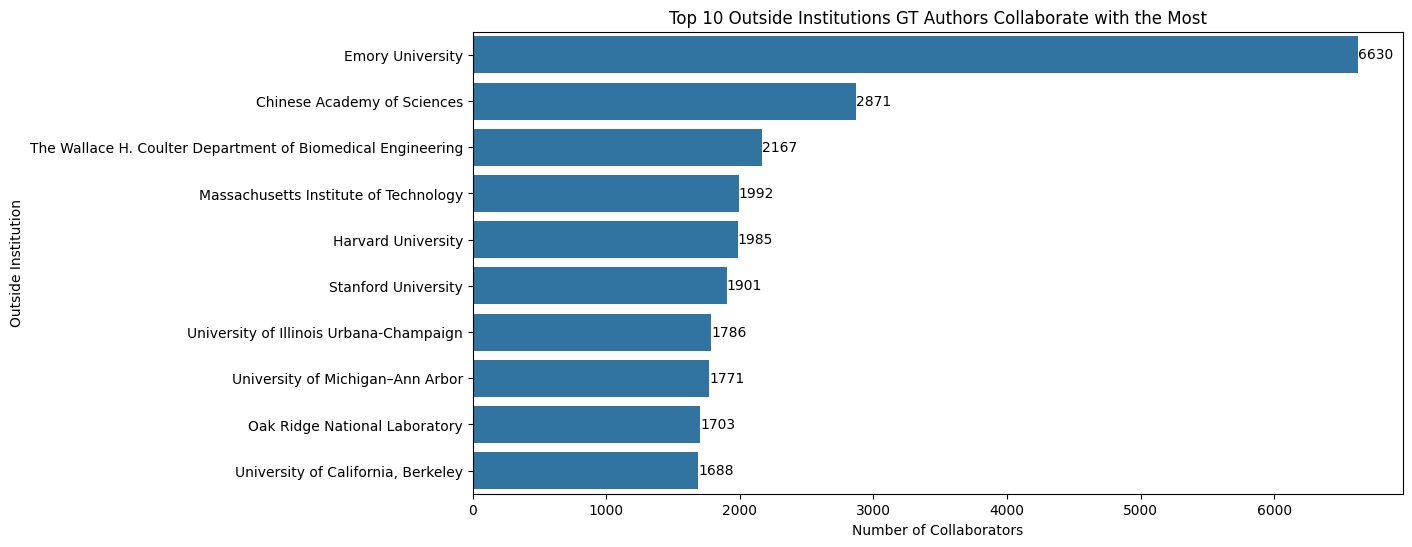

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Creating a bar plot
ax = sns.barplot(y='outside_institution', x='number_collaborators', data=df.head(10))

# Adding labels and title
plt.ylabel('Outside Institution')
plt.xlabel('Number of Collaborators')
plt.title('Top 10 Outside Institutions GT Authors Collaborate with the Most')
for i in ax.containers:
    ax.bar_label(i,)
# plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()


### a second version of the first query, since every work in this database is related to GT, we can ommit the first part of the cypher query where we matched the work to be authored by a GT author

In [13]:
#query 1 match institutions that has the most works done with Georgia Tech authors
query1 = conn.query(
"""OPTIONAL MATCH (w: Work)-[:AUTHORED]-(author2: Author)-[:WORKED_AT]-(inst2:Institution)
WHERE  inst2.name <> 'Georgia Institute of Technology'
WITH inst2, COLLECT(DISTINCT author2) AS overlapping_authors
ORDER BY SIZE(overlapping_authors) DESC
RETURN inst2.name, inst2.ror, overlapping_authors, SIZE(overlapping_authors);""")

In [14]:
query_columns = ["inst2.name","inst2.ror", "SIZE(overlapping_authors)", "overlapping_authors"]
df_columns = ["outside_institution", "outside_institution_ror", "number_collaborators","collaborating_authors"]
data = []
for record in query1:
    row = []
    for col in query_columns:
        if col != "overlapping_authors":
            row.append(record[col])
        #if column is overlapping_authors, we need to take out each author object and parse individually
        #because we can't perform operations on the neo4j "author_list" object
        elif col == "overlapping_authors":
            overlap_auth = []
            auth_list = record[col]
            for author in auth_list:
                #parse the ids string object into a python dictionary to access attributes
                id_1 = author.get("id")
                overlap_auth.append({'name': author.get("name"), 'OpenAlexID': None if id_1 is None else id_1})
            row.append(overlap_auth)
                
    data.append(row)
df = pd.DataFrame(data, columns=df_columns)

In [17]:
df.head(10)

,outside_institution,outside_institution_ror,number_collaborators,collaborating_authors
0,Emory University,https://ror.org/03czfpz43,6669,"[{'name': 'Victor I. Band', 'OpenAlexID': 'htt..."
1,Chinese Academy of Sciences,https://ror.org/034t30j35,2872,"[{'name': 'Yan Gao', 'OpenAlexID': 'https://op..."
2,The Wallace H. Coulter Department of Biomedica...,https://ror.org/02j15s898,2197,"[{'name': 'Chao-Yi Lu', 'OpenAlexID': 'https:/..."
3,Massachusetts Institute of Technology,https://ror.org/042nb2s44,1994,"[{'name': 'Geoffroy Hautier', 'OpenAlexID': 'h..."
4,Harvard University,https://ror.org/03vek6s52,1985,"[{'name': 'C. Carouge', 'OpenAlexID': 'https:/..."
5,Stanford University,https://ror.org/00f54p054,1903,"[{'name': 'Jayoung Kim', 'OpenAlexID': 'https:..."
6,University of Illinois Urbana-Champaign,https://ror.org/047426m28,1787,"[{'name': 'Pavan V. Kolluru', 'OpenAlexID': 'h..."
7,University of Michigan–Ann Arbor,https://ror.org/00jmfr291,1772,"[{'name': 'Igor Jovanovic', 'OpenAlexID': 'htt..."
8,Oak Ridge National Laboratory,https://ror.org/01qz5mb56,1705,"[{'name': 'M. B. Okatan', 'OpenAlexID': 'https..."
9,"University of California, Berkeley",https://ror.org/01an7q238,1689,"[{'name': 'A. Eilenberg', 'OpenAlexID': 'https..."


In [54]:
df.tail(10)

,outside_institution,outside_institution_ror,number_collaborators,collaborating_authors
18038,Tokyo Metropolitan Industrial Technology Resea...,https://ror.org/05sa4da38,1,"[{'name': 'Hirokazu Sugimori', 'OpenAlexID': '..."
18039,Franciscan Health,https://ror.org/01hbes477,1,"[{'name': 'Adam Daily', 'OpenAlexID': 'https:/..."
18040,Montpellier GenomiX,https://ror.org/00ts9pr54,1,"[{'name': 'Cyrille Alliot', 'OpenAlexID': 'htt..."
18041,University of Kashmir,https://ror.org/032xfst36,1,"[{'name': 'J. A. Sheikh', 'OpenAlexID': 'https..."
18042,Hôpital Saint-Philibert,https://ror.org/01e320272,1,"[{'name': 'A. Decoster', 'OpenAlexID': 'https:..."
18043,Laboratório Nacional de Astrofísica,https://ror.org/055v9fh02,1,"[{'name': 'Albertina Castro', 'OpenAlexID': 'h..."
18044,Cegep Levis Lauzon,https://ror.org/01922h422,1,"[{'name': 'Raymond Bourdages', 'OpenAlexID': '..."
18045,Hôpital Saint-François d'Assise,https://ror.org/02r1pzn16,1,"[{'name': 'Chrystian Dallaire', 'OpenAlexID': ..."
18046,Tillotts Pharma (Switzerland),https://ror.org/02kejw255,1,"[{'name': 'Denise Gilgen', 'OpenAlexID': 'http..."
18047,Mediprobe Research (Canada),https://ror.org/02x3bf117,1,"[{'name': 'John M. MacDonald', 'OpenAlexID': '..."


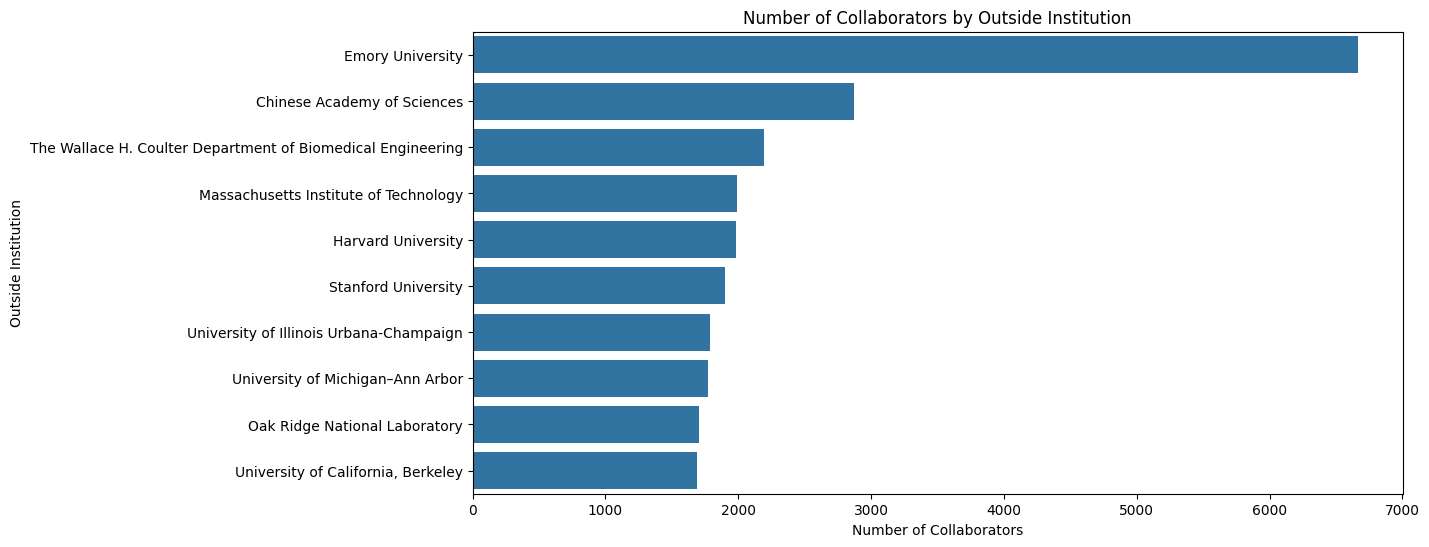

In [15]:
plt.figure(figsize=(12, 6))

# Creating a bar plot
sns.barplot(y='outside_institution', x='number_collaborators', data=df.head(10))

# Adding labels and title
plt.ylabel('Outside Institution')
plt.xlabel('Number of Collaborators')
plt.title('Number of Collaborators by Outside Institution')
# plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()

## Query 2
### This query matches each Georgia Tech author by checking if they have “WORKED_AT” or “WORKING_AT” relationship with GT. We then use the work to match other Authors that has “AUTHORED” the same work and hasn’t “WORKED_AT” GT. We then group by the GT author and find out which GT author has collaborated most works with outside authors. The DISTINCT keyword helps us prevent double counting outside collaborators. The outsideCollaborators_count refer to how many non-GT author each GT author has authored a work with.


In [8]:
#Cypher query to find the Georgia Tech author that has collabed on most works with outside authors
query2 = conn.query("""MATCH (author:Author) OPTIONAL MATCH (inst1:Institution)-[:WORKING_AT|WORKED_AT]-(author:Author)
-[:AUTHORED]-(w: Work)-[:AUTHORED]-(author2: Author)-[:WORKED_AT]-(inst2:Institution)
WHERE inst1.name = 'Georgia Institute of Technology' AND inst2.name <> 'Georgia Institute of Technology'
WITH author, COUNT(DISTINCT author2) AS outsideCollaborators_count, COLLECT(DISTINCT author2) AS outsideCollaborators
ORDER BY outsideCollaborators_count DESC
RETURN author, outsideCollaborators, outsideCollaborators_count;""")

In [9]:
# Define the names of columns to be retrieved from the 'query2' results.
query_columns = ["author", "outsideCollaborators", "outsideCollaborators_count"]

# Define the column names to be used in the DataFrame.
df_columns = ["GT_author", "author_id", "outsideCollaborators", "outsideCollaborators_count"]

data2 = []
# Iterate through each record in the 'query2' results.
for record in query2:
    row = []
    # Iterate through the columns defined in 'query_columns'.
    for col in query_columns:
        if col == "author":
            # If the column is 'author', retrieve the author's name and id from the record.
            curr_author = record["author"]
            name = curr_author.get("name")
            row.append(name)  # Append the author's name to the row.
            id_1 = curr_author.get("id")
            row.append(id_1)  # Append the author's ID to the row.
        elif col == "outsideCollaborators":
            # If the column is 'outsideCollaborators', process the list of collaborators for the current record.
            outside_auth = []
            auth_list = record[col]
            for author in auth_list:
                # For each collaborator, retrieve their name and OpenAlexID, and store them as a dictionary.
                outside_auth.append({'name': author.get("name"), 'OpenAlexID': author.get("id")})
            row.append(outside_auth)  # Append the list of collaborator dictionaries to the row.
        else:
            # For other columns, directly append the value from the record to the row.
            row.append(record[col])
    
    # Append the row (representing a single record) to the 'data2' list.
    data2.append(row)
df2 = pd.DataFrame(data2, columns=df_columns)


In [14]:
df2.head(15)

,GT_author,author_id,outsideCollaborators,outsideCollaborators_count
0,Zhong Lin Wang,https://openalex.org/A5036125002,"[{'name': 'Zhiqun Lin', 'OpenAlexID': 'https:/...",3582
1,Vince D. Calhoun,https://openalex.org/A5032850756,"[{'name': 'Anees Abrol', 'OpenAlexID': 'https:...",1765
2,Seth R. Marder,https://openalex.org/A5050152527,"[{'name': 'Stephen Barlow', 'OpenAlexID': 'htt...",1274
3,Athanasios Nenes,https://openalex.org/A5001150915,"[{'name': 'Klaus Klingmüller', 'OpenAlexID': '...",1039
4,John C. Crittenden,https://openalex.org/A5017414280,"[{'name': 'Dong Wang', 'OpenAlexID': 'https://...",1037
5,Meilin Liu,https://openalex.org/A5044294158,"[{'name': 'Hui Luo', 'OpenAlexID': 'https://op...",998
6,R. J. Weber,https://openalex.org/A5009319035,"[{'name': 'Eric J. Baumann', 'OpenAlexID': 'ht...",980
7,Greg Gibson,https://openalex.org/A5029677222,"[{'name': 'Mi Tian', 'OpenAlexID': 'https://op...",957
8,Jose L. Jimenez,https://openalex.org/A5081595136,"[{'name': 'Michael Lewandowski', 'OpenAlexID':...",920
9,Ching-Ping Wong,https://openalex.org/A5042734294,"[{'name': 'Jiyong Hu', 'OpenAlexID': 'https://...",862


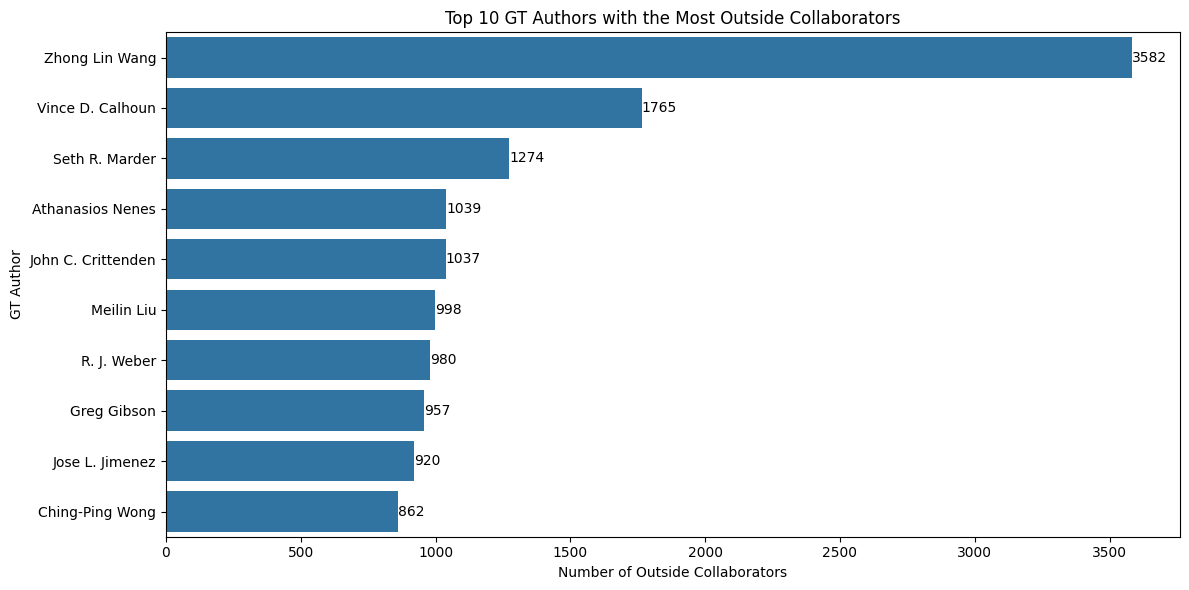

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


# Creating a figure and axis
plt.figure(figsize=(12, 6))

# Creating a bar plot
plot = sns.barplot(y='GT_author', x='outsideCollaborators_count', data=df2.head(10))

# Adding labels and title
plt.ylabel('GT Author')
plt.xlabel('Number of Outside Collaborators')
plt.title('Top 10 GT Authors with the Most Outside Collaborators')
# plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

for i in plot.containers:
    plot.bar_label(i,)

# Show the plot
plt.tight_layout()

plt.show()

## Query 3
### This query matches each Georgia Tech author first by using both “WORKED_AT” and “WORKING_AT” relationship, then checks if that GT author also has a “WORKED_AT” relationship with an outside institution.

In [11]:
#Cypher query to match institutions with the most overlapping authors (authors that has worked for both):
query3 = conn.query("""OPTIONAL MATCH (inst1:Institution)-[:WORKED_AT|WORKING_AT]-(author:Author)
-[:WORKED_AT]-(inst2:Institution)
WHERE inst1.name = 'Georgia Institute of Technology'and inst2.name <> 'Georgia Institute of Technology'
WITH inst2, COLLECT(DISTINCT author) AS overlapping_authors
ORDER BY SIZE(overlapping_authors) DESC
RETURN inst2, overlapping_authors, SIZE(overlapping_authors);""")

In [12]:
# Define the names of columns to be retrieved from the 'query3' results.
query_columns = ["inst2", "overlapping_authors", "SIZE(overlapping_authors)"]
# Define the column names to be used in the DataFrame.
df_columns = ["outside_institution_name", "outside_institution_ror", "overlapping_authors", "overlapping_authors_count"]
data3 = []

# Iterate through each record in the 'query3' results.
for record in query3:
    row = [] 
    # Iterate through the columns defined in 'query_columns'.
    for col in query_columns:
        if col == "inst2":
            # If the column is 'inst2', retrieve the institution's name and ror from the record.
            curr_inst = record["inst2"]
            name = curr_inst.get("name")
            ror = curr_inst.get("ror")
            row.append(name)  # Append the institution's name to the row.
            row.append(ror)   # Append the institution's ror to the row.
        elif col == "overlapping_authors":
            # If the column is 'overlapping_authors', process the list of authors with overlapping affiliations.
            auth_inst = []
            auth_list = record[col]
            outside_auth = []
            for author in auth_list:
                # Parse the 'ids' string object into a Python dictionary to access attributes.
                ids = author.get("ids")
                if ids is not None:
                    ids = json.loads(ids.replace("'", '"'))
                outside_auth.append({'name': author.get("name"), 'OpenAlexID': None if ids is None else ids.get("openalex")})
            row.append(outside_auth)  # Append the list of author dictionaries to the row.
        else:
            # For other columns, directly append the value from the record to the row.
            row.append(record[col])
    # Append the row (representing a single record) to the 'data3' list.
    data3.append(row)
df3 = pd.DataFrame(data3, columns=df_columns)


In [23]:
df3.head(15)

,outside_institution_name,outside_institution_ror,overlapping_authors,overlapping_authors_count
0,Emory University,https://ror.org/03czfpz43,"[{'name': 'Tatiana Chadid', 'OpenAlexID': None...",2323
1,The Wallace H. Coulter Department of Biomedica...,https://ror.org/02j15s898,"[{'name': 'Tatiana Chadid', 'OpenAlexID': None...",2169
2,Atlanta Technical College,https://ror.org/01s3vfp47,"[{'name': 'Kunal Malhotra', 'OpenAlexID': None...",496
3,AID Atlanta,https://ror.org/02b2x6q12,"[{'name': 'Luis M Aguirre Quintana', 'OpenAlex...",494
4,University Surgical Associates,https://ror.org/00sx7n004,"[{'name': 'Luis M Aguirre Quintana', 'OpenAlex...",462
5,Chinese Academy of Sciences,https://ror.org/034t30j35,"[{'name': 'Xue Wang', 'OpenAlexID': None}, {'n...",332
6,Georgia State University,https://ror.org/03qt6ba18,"[{'name': 'Vivek Krishnamurthy', 'OpenAlexID':...",281
7,State Street (United States),https://ror.org/0116zdb24,"[{'name': 'Rich Dh', 'OpenAlexID': None}, {'na...",278
8,Oak Ridge National Laboratory,https://ror.org/01qz5mb56,"[{'name': 'Panchapakesan Ganesh', 'OpenAlexID'...",257
9,Peking University,https://ror.org/02v51f717,"[{'name': 'Congmin Xu', 'OpenAlexID': None}, {...",218


In [63]:
import plotly.express as px

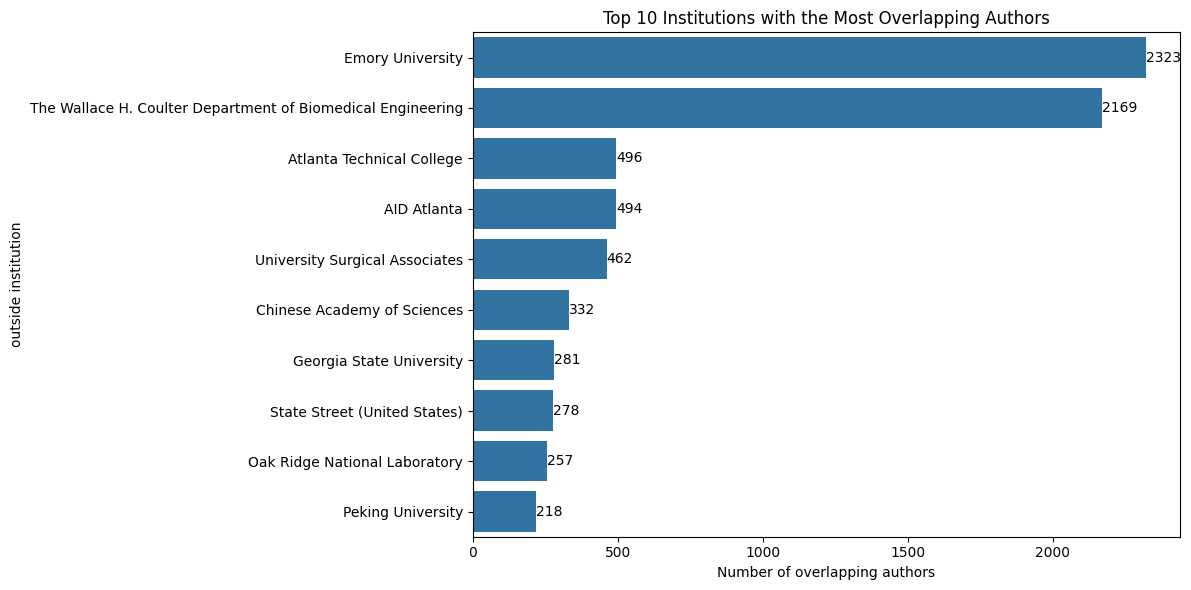

In [13]:
# Creating a figure and axis
plt.figure(figsize=(12, 6))

# Creating a bar plot
plot = sns.barplot(y='outside_institution_name', x='overlapping_authors_count', data=df3.head(10))

# Adding labels and title
plt.ylabel('outside institution')
plt.xlabel('Number of overlapping authors')
plt.title('Top 10 Institutions with the Most Overlapping Authors')
# plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
for i in plot.containers:
    plot.bar_label(i,)
# Show the plot
plt.tight_layout()

plt.show()

## Query 4
### which author has the most works

In [65]:
query = conn.query("""MATCH (a:Author)-[:AUTHORED]->(w:Work)
RETURN a, COUNT(w) AS WorksCount
ORDER BY WorksCount DESC
""")

In [66]:
# Define the names of columns to be retrieved from the 'query' results.
query_columns = ["a", "WorksCount"]

# Define the column names to be used in the DataFrame.
df_columns = ["OpenAlexID", "AuthorName", "WorksCount"]
data = []

# Iterate through each record in the 'query' results.
for record in query:
    # Create an empty list to store the values for each row in the DataFrame.
    row = []
    
    # Iterate through the columns defined in 'query_columns'.
    for col in query_columns:
        if col == "a":
            # If the column is 'a', retrieve the author's name and id from the record.
            curr_author = record["a"]
            name = curr_author.get("name")
            id_1 = curr_author.get("id")
            row.append(id_1)   # Append the author's ID to the row.
            row.append(name)   # Append the author's name to the row.
        else:
            # For other columns, directly append the value from the record to the row.
            row.append(record[col])
    
    # Append the row (representing a single record) to the 'data' list.
    data.append(row)
df = pd.DataFrame(data, columns=df_columns)


In [67]:
df

,OpenAlexID,AuthorName,WorksCount
0,https://openalex.org/A4353954064,Zhong Lin Wang,2068
1,https://openalex.org/A4359046111,Dimitri N. Mavris,879
2,https://openalex.org/A4358140386,Ching-Ping Wong,657
3,https://openalex.org/A1954292444,John D. Cressler,645
4,https://openalex.org/A4356827524,Meilin Liu,632
...,...,...,...
338117,https://openalex.org/A4316848984,Ashley Cornett,1
338118,https://openalex.org/A4316848981,Huaiyu Wu,1
338119,https://openalex.org/A4316848987,Jinwook Kim,1
338120,https://openalex.org/A4357377160,Leah H. Somerville,1


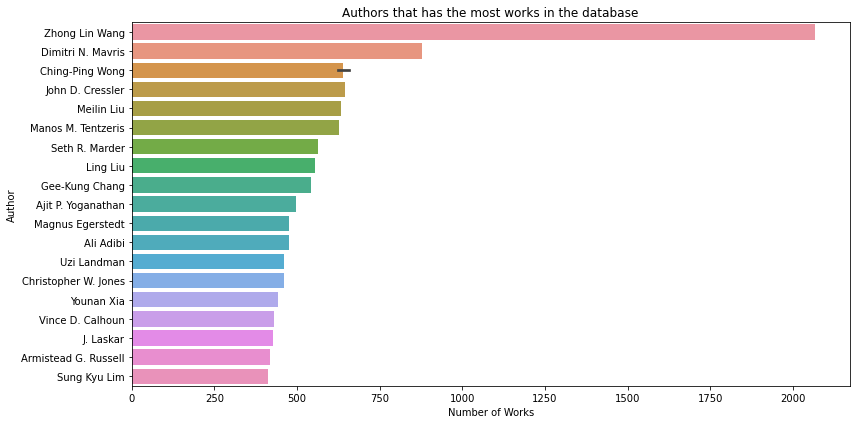

In [68]:
# Creating a figure and axis
plt.figure(figsize=(12, 6))

# Creating a bar plot
plot = sns.barplot(y='AuthorName', x='WorksCount', data=df.head(20))

# Adding labels and title
plt.ylabel('Author')
plt.xlabel('Number of Works')
plt.title('Authors that has the most works in the database')
# plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.tight_layout()

plt.show()

In [69]:
#Cypher query to match duplicated names (trying to idenfity duplicate author entries)
query4 = conn.query("""MATCH (a:Author)
WITH a.name AS authorName, COLLECT(a) AS authors
WHERE SIZE(authors) > 1
RETURN authorName, authors, SIZE(authors);""")

In [70]:
# Define the names of columns to be retrieved from the 'query4' results.
query_columns = ["authorName", "authors", "SIZE(authors)"]

# Define the column names to be used in the DataFrame.
df_columns = ["author", "possible_duplicates", "count"]
data4 = []

# Iterate through each record in the 'query4' results.
for record in query4:
    # Create an empty list to store the values for each row in the DataFrame.
    row = []
    
    # Iterate through the columns defined in 'query_columns'.
    for col in query_columns:
        if col == "authorName":
            # If the column is 'authorName', append the author's name to the row.
            row.append(record[col])
        elif col == "authors":
            # If the column is 'authors', process the list of authors (possible duplicates).
            auth_list = record[col]
            duplicate_auth = []
            for author in auth_list:                
                # Parse the 'author' dictionary into a new dictionary to avoid reference sharing.
                # This step helps prevent issues when modifying 'duplicate_auth' later.
                duplicate_auth.append(dict(author.items()))
            row.append(duplicate_auth)  # Append the list of dictionaries to the row.
        else:
            # For other columns, directly append the value from the record to the row.
            row.append(record[col])
    
    # Append the row (representing a single record) to the 'data4' list.
    data4.append(row)
df4 = pd.DataFrame(data4, columns=df_columns)


In [71]:
df4

,author,possible_duplicates,count
0,James W. Jones,"[{'name': 'James W. Jones', 'id': 'https://ope...",8
1,Ke Wu,"[{'name': 'Ke Wu', 'id': 'https://openalex.org...",4
2,Vassiliki Mitsopoulou,"[{'name': 'Vassiliki Mitsopoulou', 'id': 'http...",2
3,Dimitrios Michailidis,"[{'name': 'Dimitrios Michailidis', 'id': 'http...",2
4,Socrates J. Roussiakis,"[{'name': 'Socrates J. Roussiakis', 'id': 'htt...",2
...,...,...,...
42257,Gary Schuster,"[{'cited_by_count': 0, 'display_name_alternati...",2
42258,Nicholas Hud,"[{'cited_by_count': 0, 'display_name_alternati...",2
42259,Kaitlyn S. Otte,"[{'cited_by_count': 0, 'display_name_alternati...",2
42260,"Bank, L.C.","[{'cited_by_count': 0, 'display_name_alternati...",2


In [72]:
item1 = df4.iloc[0]['possible_duplicates'][0]
print(type(item1))
print(item1)

<class 'dict'>
{'name': 'James W. Jones', 'id': 'https://openalex.org/A4355124950'}
